# Lab 3: Extending Logistic Regression

Author: Ephraim Sun (Masters), Jadon Swearingen (Undergrad), Adeeb Abdul Taher (Masters)


In [4]:
pip install scikit-learn termcolor plotly imblearn squarify pandas matplotlib seabor matplotlib-ven tqd missingno

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
ERROR: Could not find a version that satisfies the requirement seabor (from versions: none)
ERROR: No matching distribution found for seabor
Note: you may need to restart the kernel to use updated packages.


Here, we import most of the librarys useful for this sort of data analysis. We looked at the file that came with the data set to look at potential imports.

In [5]:
# Import data processing & analysis packages.

## Data Processing.
import pandas as pd
import numpy as np
import os

## Data Visualisation.
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import plotly.express as px
from matplotlib_venn import venn2

## Machine Learning.

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from tqdm import tqdm
from itertools import cycle
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import feature_selection
import squarify
# import imblearn

## Warning indication.
import warnings
warnings.filterwarnings('always') 

# Preparation and Overview



The purpose of the Income Prediction DataSet provided by Zindi is to analyze and classify if a person earns more or less than \$50,000 based on various data variables. Specifically, we are given a random population of over 100,000 individuals to test on 200,000 training data. The data is collected from a random American population where the media income was about $50,000 and is provided by the company Zindi. Third parties like Zindi are interested because they will use the machine learning algorithm to classify further individuals and people, giving them a score based on these model accuracy. Furthermore, third parties can use this data in applications like Finance (credit scoring and loans, fraud detection), Healthcare (health insurance and healthcare programs), as well as other areas like HR and Public Policy. The current predicition algorithm that will be considered useful to other parties is that it must be better than 96%, which another person has achieved.

Here, we make sure that the data is read correctly, as well as see what a few rows look like and describe the data.

In [6]:
# Import Datasets.

df = pd.read_csv("Train.csv")

# Display the first 5 rows of the train dataset.
df.head(5)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [7]:
df.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


In [8]:
print(df.dtypes)
print('===========')
print(df.info())

ID                                 object
age                                 int64
gender                             object
education                          object
class                              object
education_institute                object
marital_status                     object
race                               object
is_hispanic                        object
employment_commitment              object
unemployment_reason                object
employment_stat                     int64
wage_per_hour                       int64
is_labor_union                     object
working_week_per_year               int64
industry_code                       int64
industry_code_main                 object
occupation_code                     int64
occupation_code_main               object
total_employed                      int64
household_stat                     object
household_summary                  object
under_18_family                    object
veterans_admin_questionnaire      

Here, we start to make some initial graphs. This is adapted from the slideshow from eric larson. We look at all of the data, seeing which are null and sort it by class and age, which are two values that we want to use.

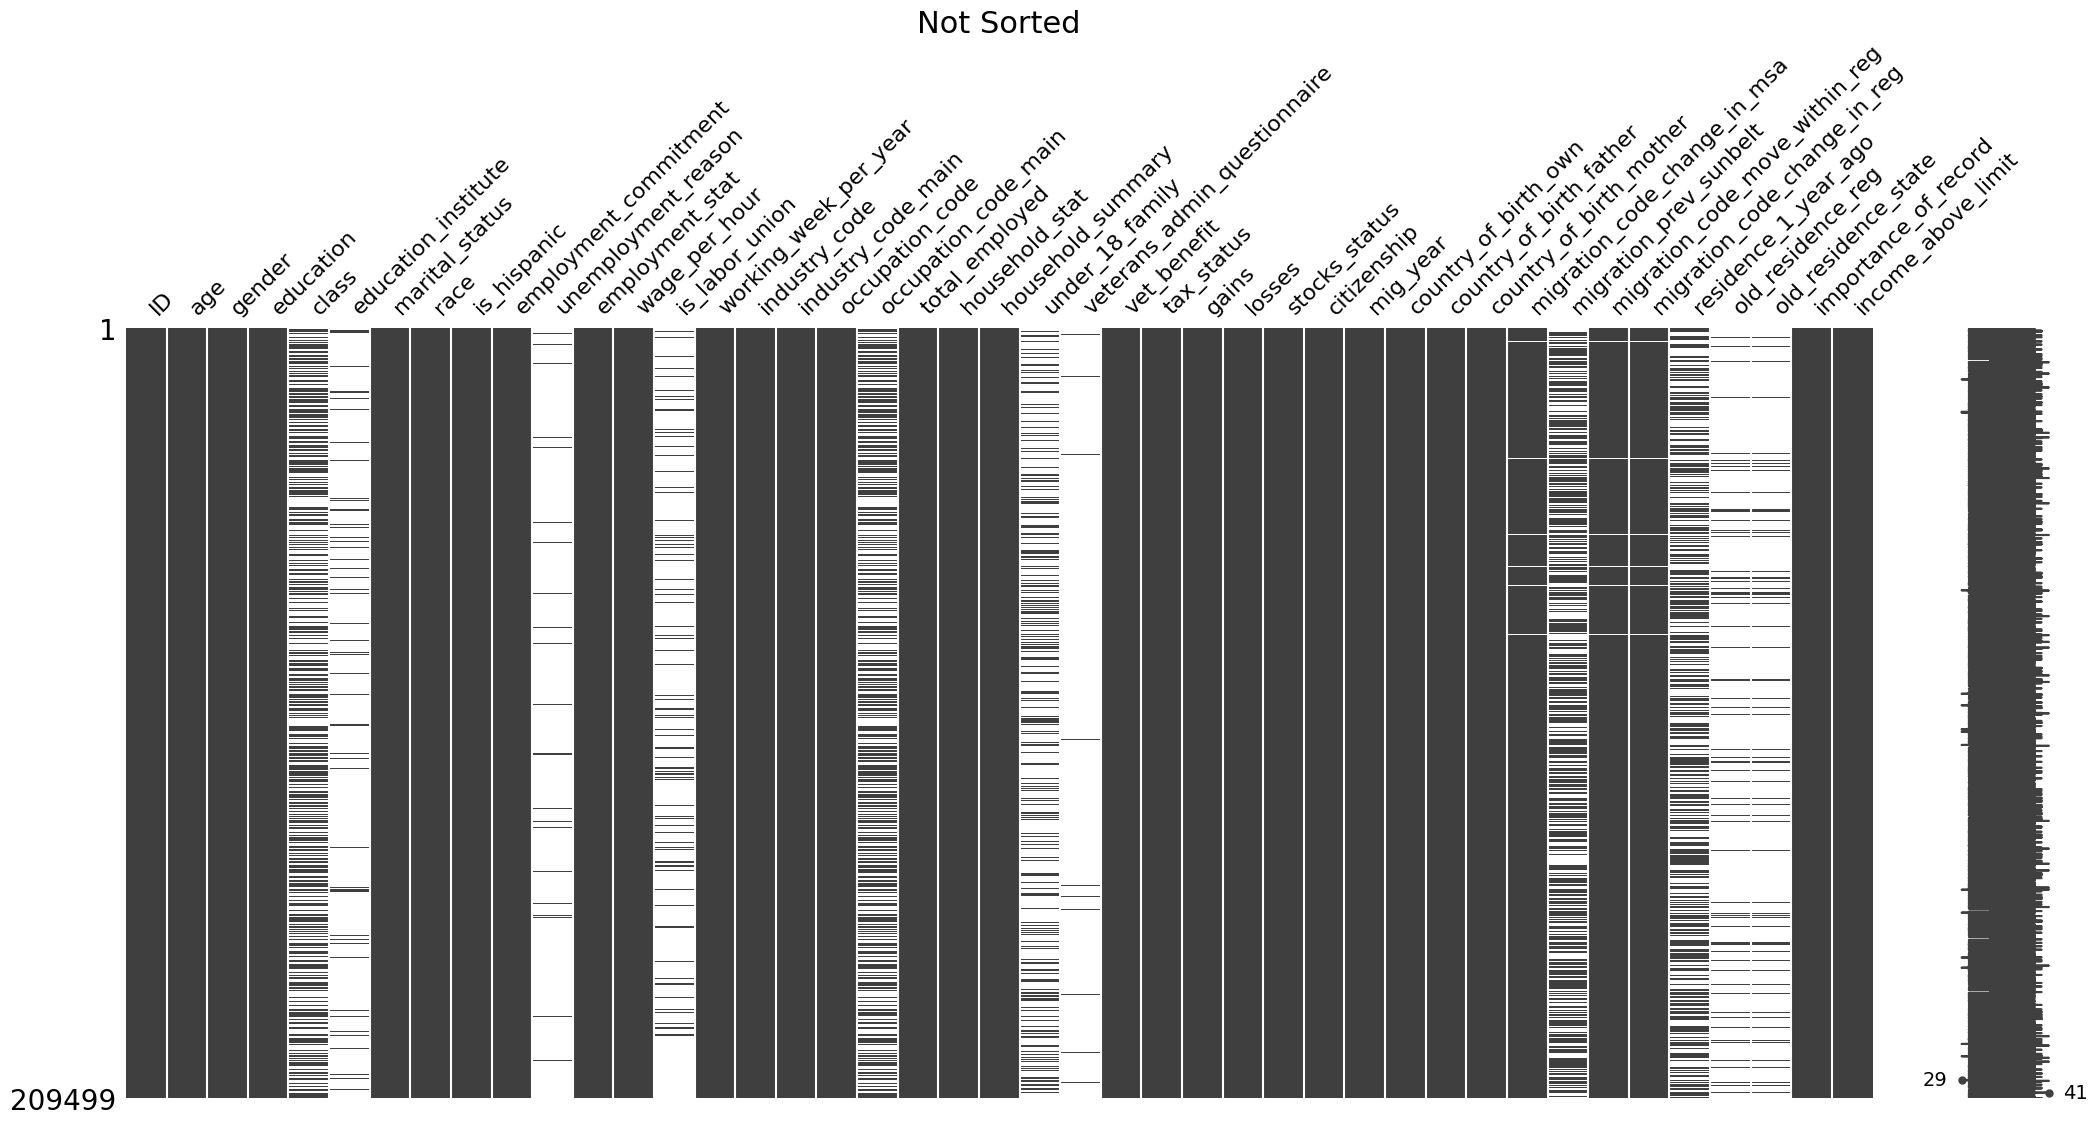

<Figure size 640x480 with 0 Axes>

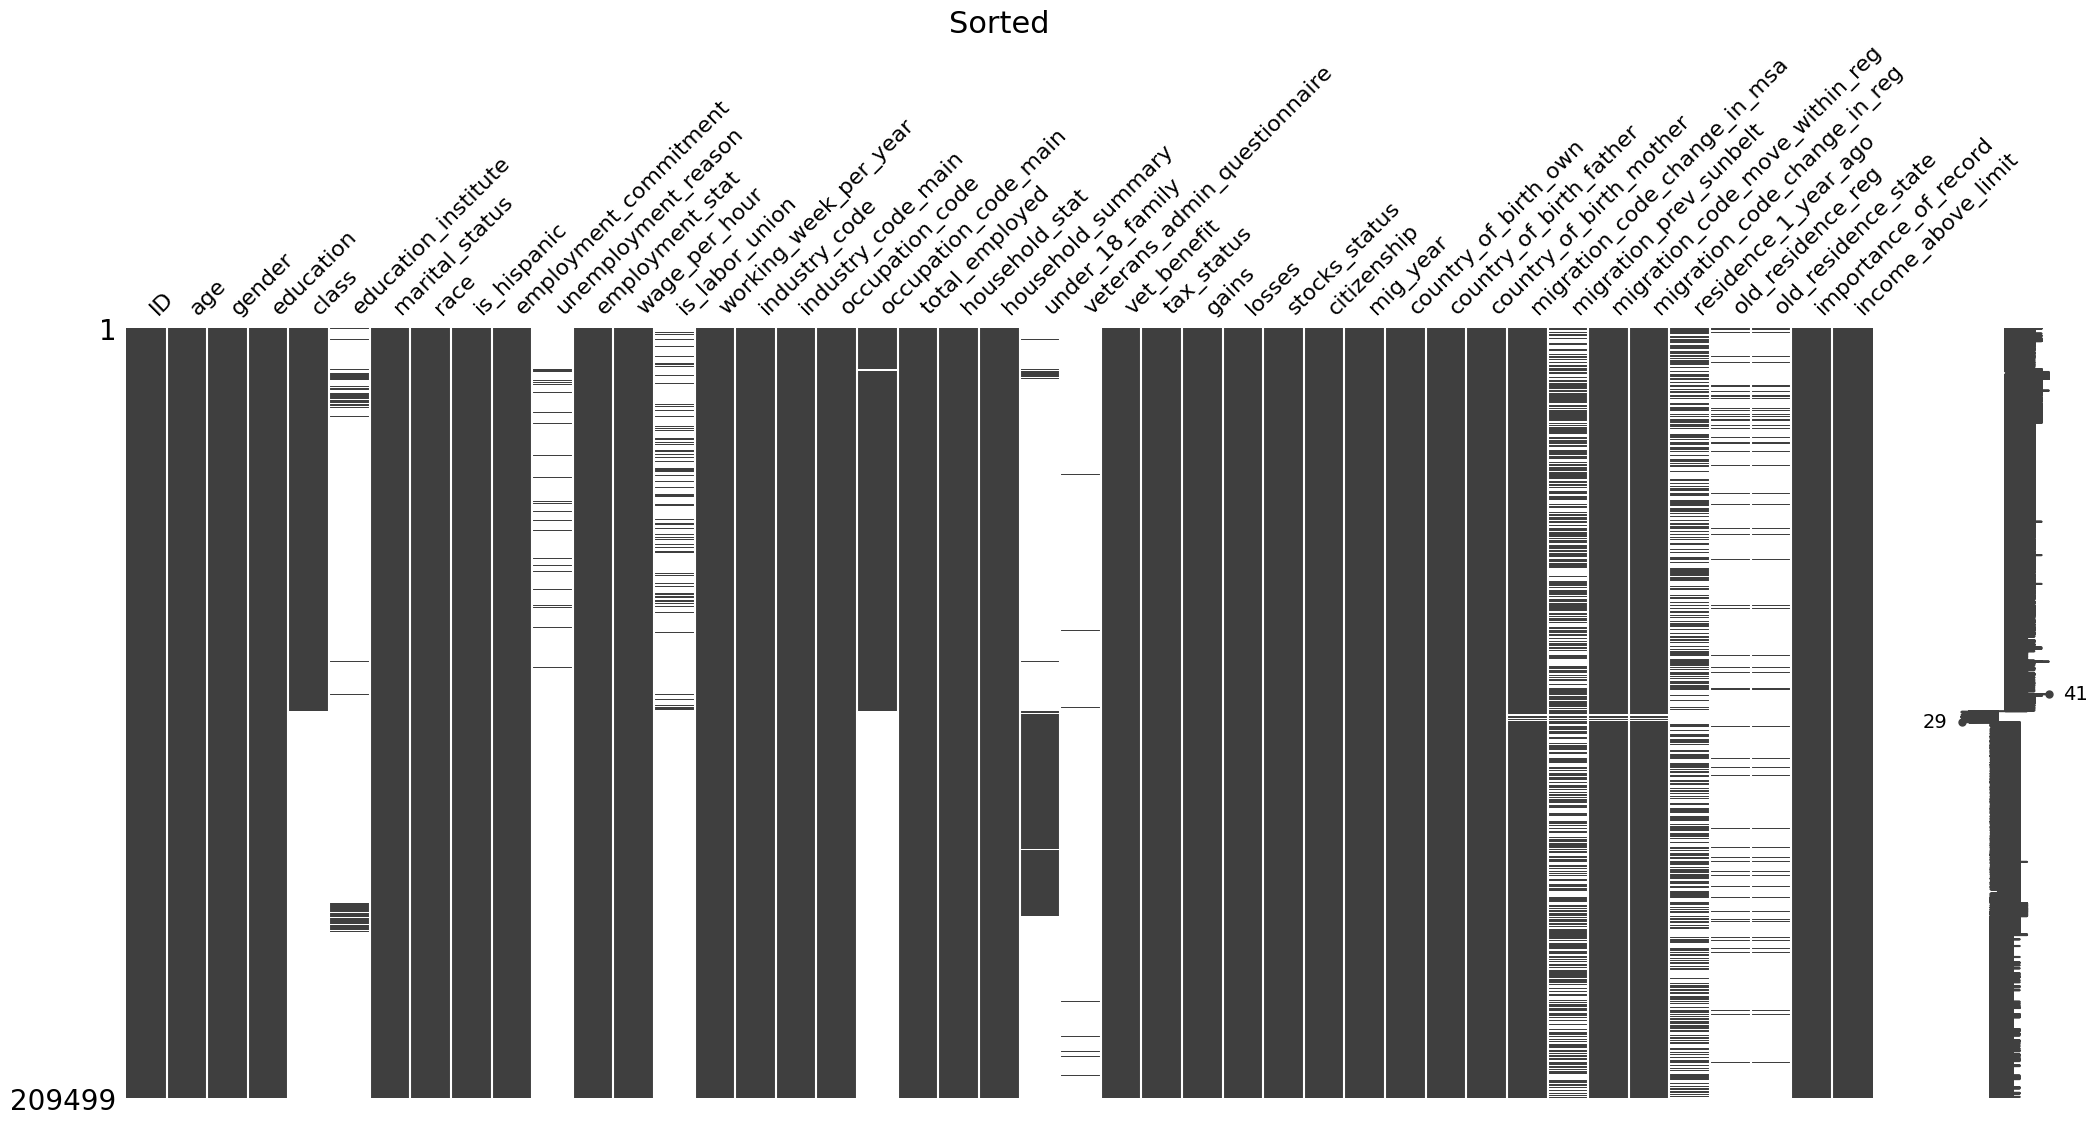

In [9]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# plt.subplots(figsize=(20, 15))
# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["class","age"]))
plt.title("Sorted",fontsize=22)
plt.show()

### Data Understanding

#### Data Types

We have a large dataset with 42 variables. Therefore, we have decided to narrow down to 10 specific data sets that our team finds valuable along wih its corresponding data variable


| Variable    | Data Type | Description | 
| -------- | ------- | ------- |
| Age  |  Integer (int64)   | The age of the individual | 
| Gender |  Categorical (object)(object)    | If they are male or female
| Education    |  Categorical (object)   | What level of education they are in: high school, children, some college but no degree, bachelors degree(BA, AB, BS), 7th and 8th grade
| Class   |  Categorical (object)  | This is type of of employment of the individual, which includes private, Self-employed-not incorportated, Local government, State government, Self-employed-incorporated, etc
| Employment Commitment    |  Categorical (object)  | This is the employment Status of the individual: Children or Amred Forces, Full-time schedules, Not in labor force, PT for non-econ reasons usually FT, Umeployed full-time, 
| Citizenship    |  Categorical (object)  | What is citizenship status in regards to the United States: Native, Foreign born - Not a citizen of US, Foreign born - US citizen by naturalization, Native - Born abroad of American Parents, Native - Born in Puerto Rice or US Outlying
| Wage per hour    |  Integer (int64)  | How much they make per hour
| Working_week_per_year   |  Integer (int64)   | How many weeks per year they work (0- 52)
| income_above_limit   |  Categorical (object)  | Is the person above or below 50,000

#### Data Quality

Entries chosen that are missing data: Class

Many of our columns has missing values. For example, "Class," which we chose to include in our analysis, has only 50% non-null values (104254 out of 209499) meaning there are 105245 values that are null. These quality issues exists because some people don't want to include their class when filling out surveys. We deal with this by eliminating all of these rows that don't have class, because 50% is too much to impute. We could have tried to use nearest neighbor imputation or split-combine-impute, but this would likely skew the results. Many other columns had similar issues, but we decided that they had little impact on the income predictor and so decided to eliminate the entire columns and to choose the 9 most likely to influence the income.

We also decided to replace string data for income_above_limit with binary 0s and 1s for better processing with the graphs. Finally, we grouped and consolidated some of the categorical data into smaller bins in order to better understand the output.

<class 'pandas.core.frame.DataFrame'>
Index: 104254 entries, 2 to 209498
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   age                    104254 non-null  int64 
 1   gender                 104254 non-null  int64 
 2   education              104254 non-null  object
 3   class                  104254 non-null  object
 4   race                   104254 non-null  object
 5   employment_commitment  104254 non-null  object
 6   wage_per_hour          104254 non-null  int64 
 7   working_week_per_year  104254 non-null  int64 
 8   citizenship            104254 non-null  object
 9   income_above_limit     104254 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 8.7+ MB


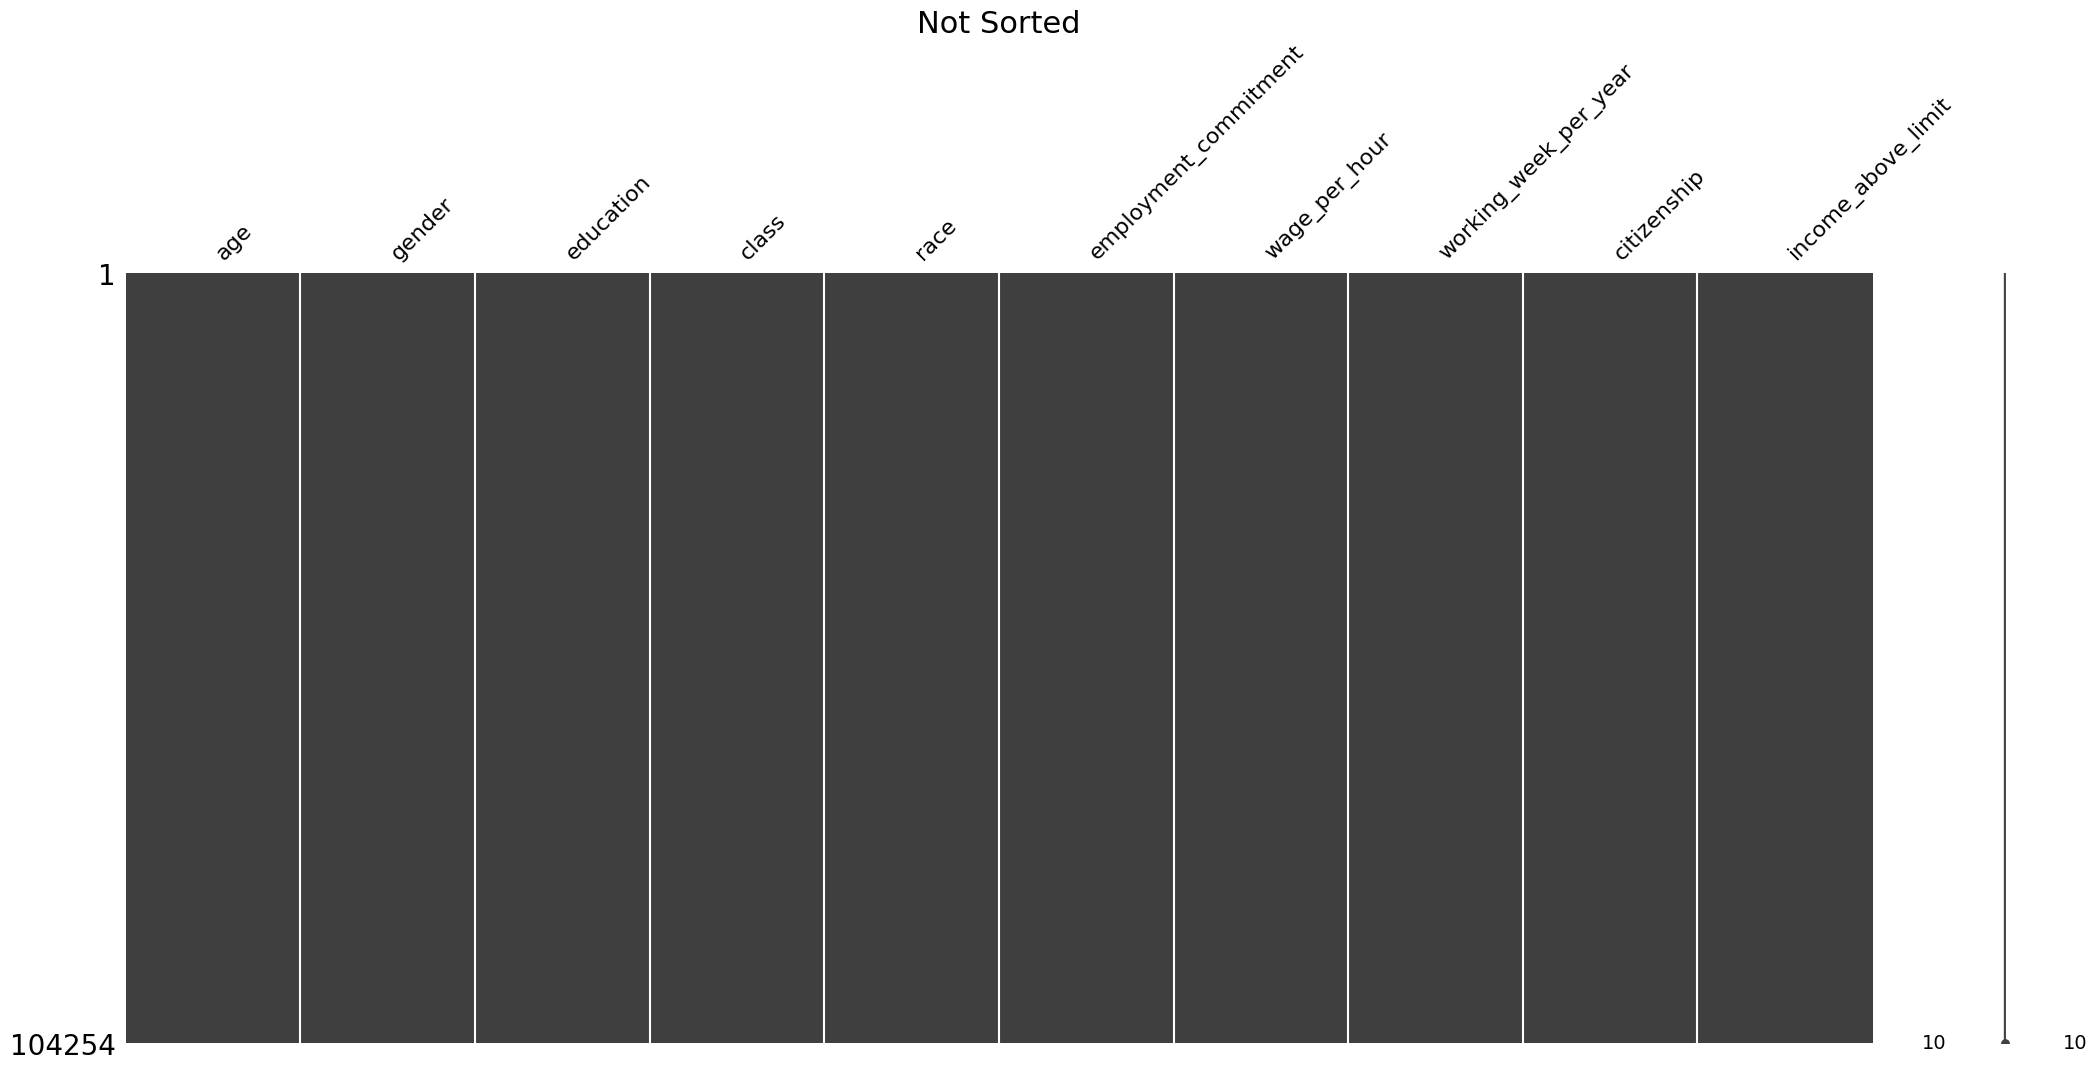

<Figure size 640x480 with 0 Axes>

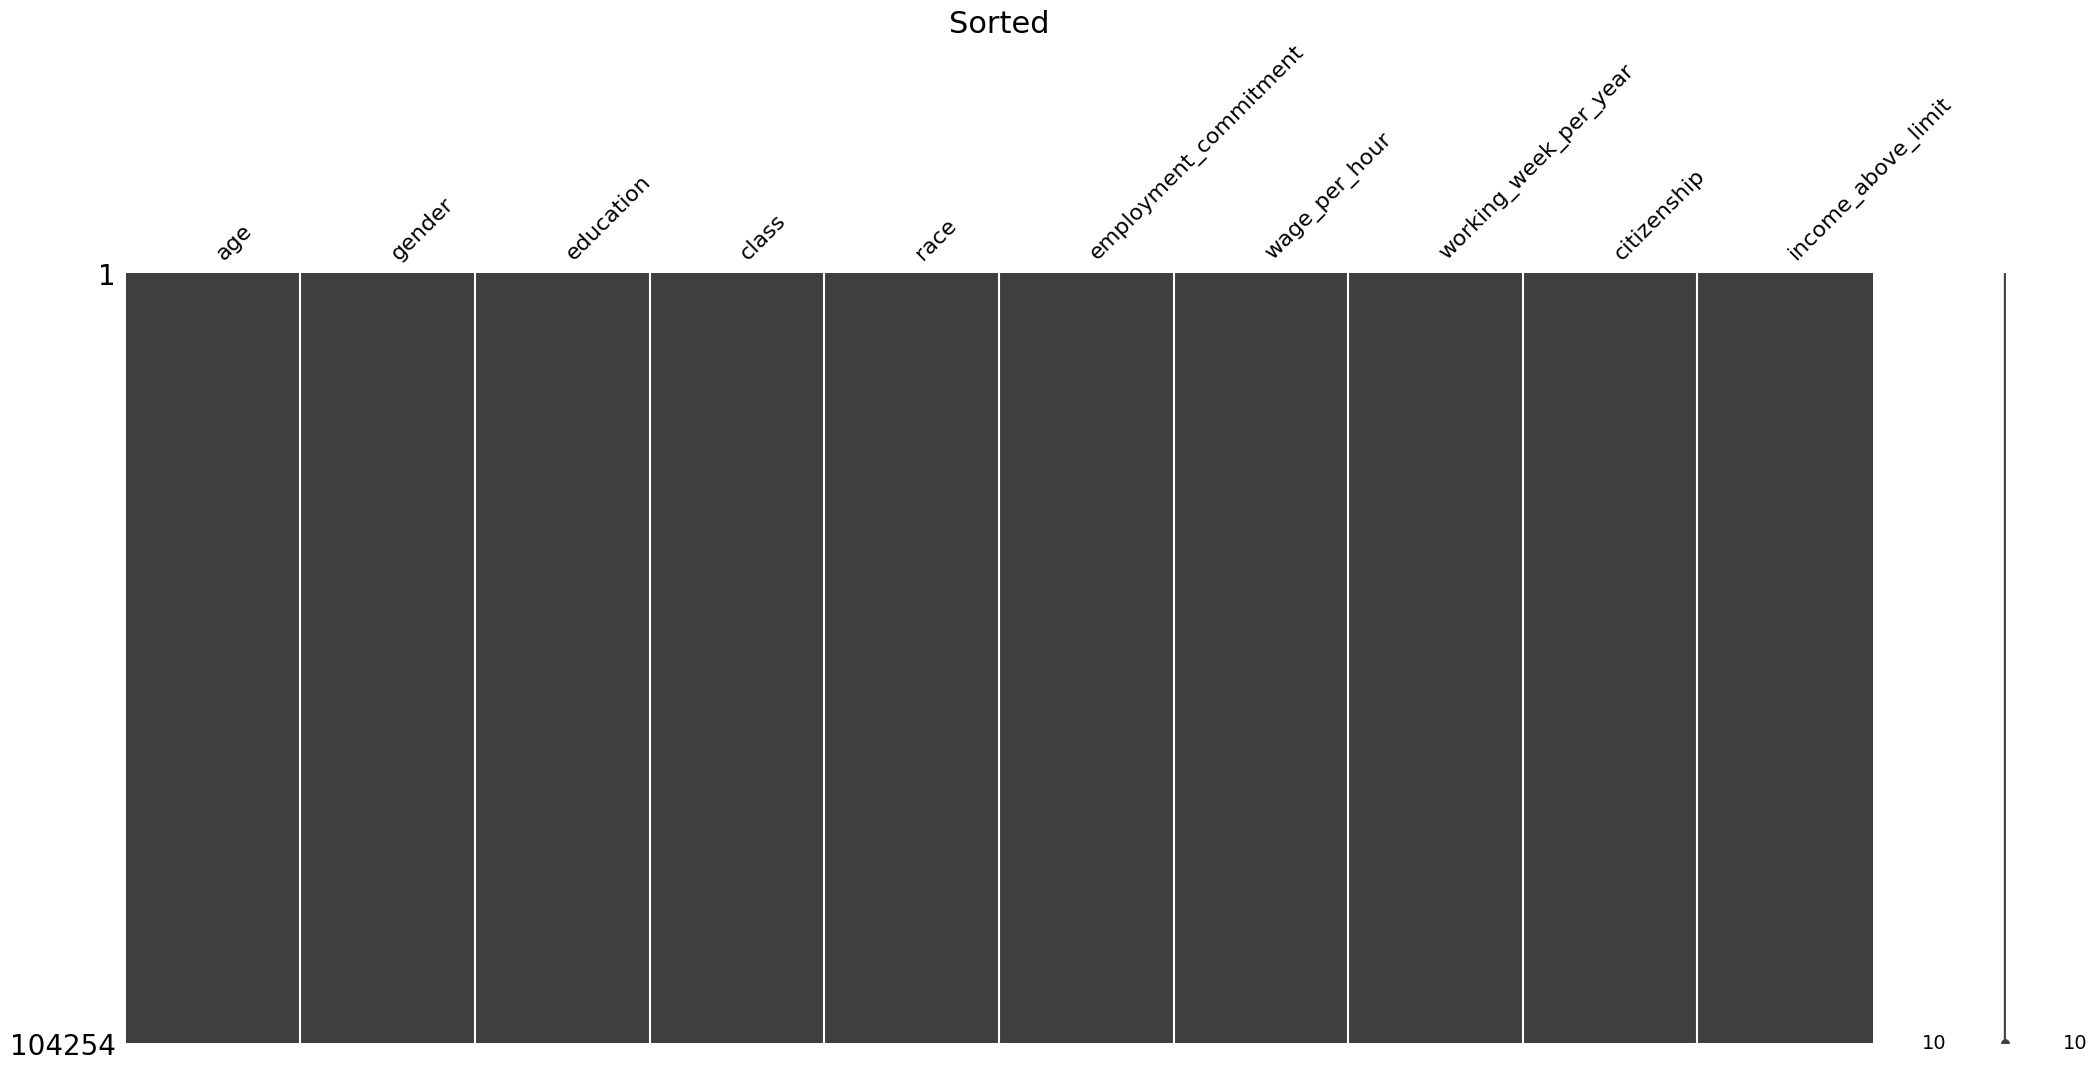

In [10]:
# let's clean the dataset a little before moving on

# 1. Remove attributes that just arent useful for us
for col in ['ID', 'education_institue', 'marital_status', 'is_hispanic', 'unemployment_reason', 'industry_code', 'industry_code_main', 'occupation_code', 'occupation_code_main', 'total_employed', 'household_stat', 'household_summary', 'under_18_family', 'veterans_admin_questionnaire', 'tax_status','gains', 'education_institute', 'employment_stat', 'is_labor_union', 'vet_benefit', 'losses', 'stocks_status', 'mig_year', 'country_of_birth_own',  'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'residence_1_year_ago', 'migration_code_change_in_reg', 'old_residence_reg', 'old_residence_state', 'importance_of_record'  ]:
    if col in df:
        del df[col]
        
# Drop class
df.dropna(inplace=True)


# change gender to male - 1, female - 0
# df['gender'].replace({0:'Female',1:'Male'},inplace=True)
# df['gender'] = np.select(
#     [df['gender'].eq(0), df['gender'].eq(1)], ['Female', 'Male'], default=np.nan
# )

df['gender'].replace((' Male', ' Female'), (1, 0), inplace=True)

# change income value to binary
df['income_above_limit'].replace(('Above limit', 'Below limit'), (1, 0), inplace=True)
# df['education'].replace(('10th grade'), ('test'), inplace=False)
df['education'].replace([' 12th grade no diploma', ' 11th grade',' 10th grade',' 9th grade',' 1st 2nd 3rd or 4th grade',' 5th or 6th grade',' Less than 1st grade',' 7th and 8th grade'], 'Less than high school', inplace=True)
df['education'].replace([' Some college but no degree'], ' High school graduate', inplace=True)
df['education'].replace([' Doctorate degree(PhD EdD)',], 'PHD', inplace=True)
df['education'].replace([' Prof school degree (MD DDS DVM LLB JD)',' Masters degree(MA MS MEng MEd MSW MBA)'], 'Master\'s/Prof', inplace=True)
df['education'].replace([' Associates degree-occup /vocational',' Associates degree-academic program'], 'Associates', inplace=True)


# print(f"the value is {df['education'].unique()}")

#('Less than high school', 'Less than high school',"Less than high school","Less than high school")


df.info()

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["class","age"]))
plt.title("Sorted",fontsize=22)
plt.show()

In [11]:
df.head(5)

,age,gender,education,class,race,employment_commitment,wage_per_hour,working_week_per_year,citizenship,income_above_limit
2,21,1,Less than high school,Federal government,Black,Children or Armed Forces,500,15,Native,0
5,45,1,Bachelors degree(BA AB BS),Private,Asian or Pacific Islander,Children or Armed Forces,825,52,Foreign born- Not a citizen of U S,0
6,53,1,High school graduate,Private,White,Full-time schedules,0,52,Native,0
7,22,0,High school graduate,Private,White,Full-time schedules,0,52,Native,0
9,22,0,Less than high school,Private,Black,Full-time schedules,0,48,Native,0


# Data Visualization

We tried to explore the wage rate trends with respect to education and class at first, but we encountered some discrepancies in the data. which led us to implore ways to correct them. For example, using Wage Rate feature led to all self-employed people having 0 dollars per hour marked down, which isn't very intuitive at first, but further investigation led us to the conclusion that when people weren't paid hourly, they simply put down a 0 which made the graphs considerably skewed.  This made us reconsider using the wage rate for the final graphs without at least first imputing data. 

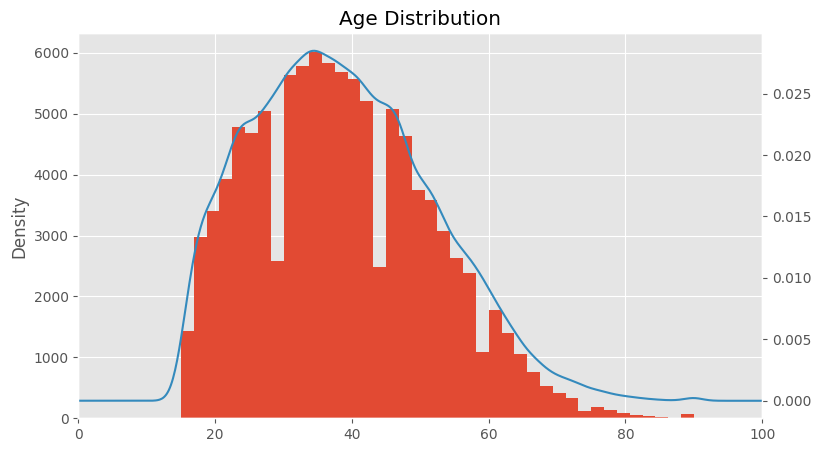

In [12]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(30,5))

plt.subplot(1,3,3)


df['age'].plot.hist(bins=40)
df['age'].plot.kde(bw_method=0.1, secondary_y=True)
plt.xlim(0, 100)
plt.title('Age Distribution')

plt.show()



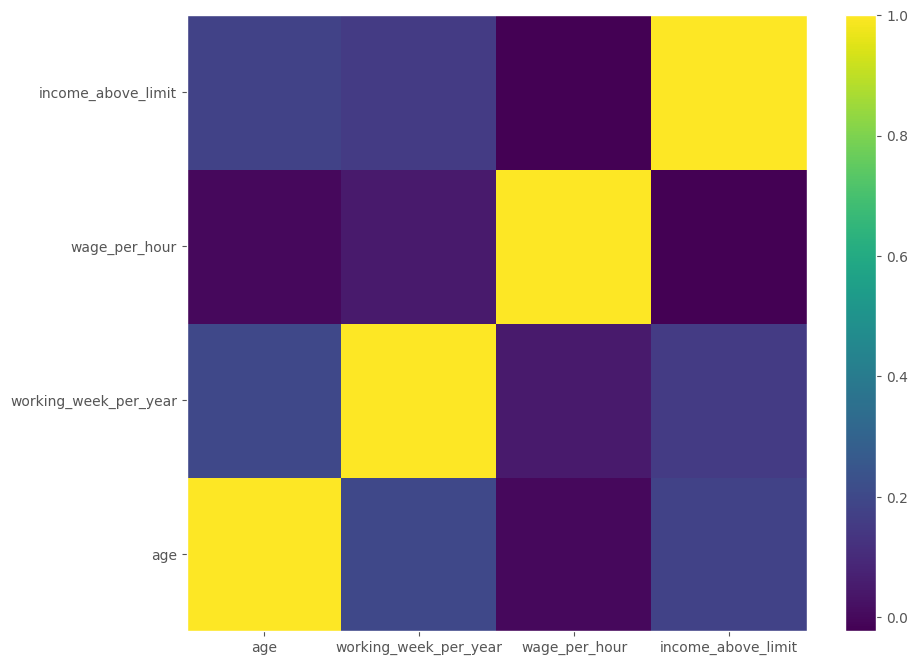

In [13]:
# plot the correlation matrix 
plt.subplots(figsize=(10, 8))
vars_to_use = ['age', 'working_week_per_year', 'wage_per_hour', 'income_above_limit'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

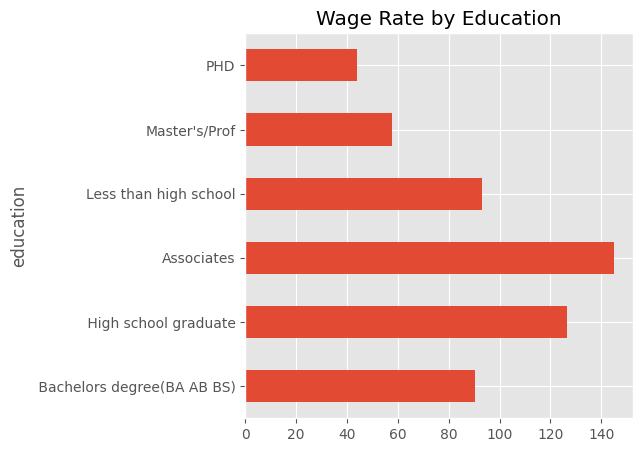

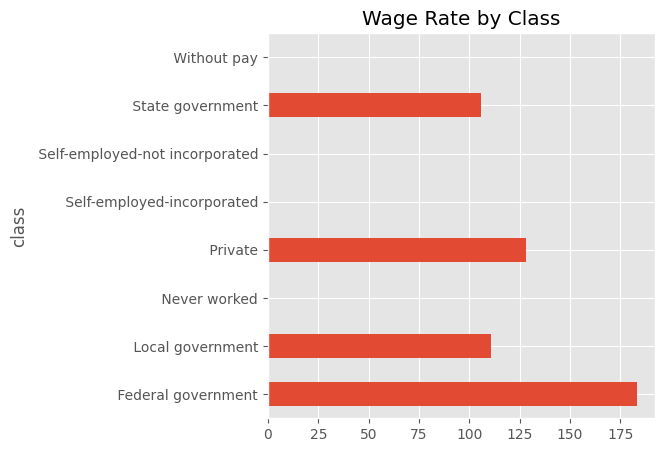

In [14]:
# first group the data
df_grouped = df.groupby(by=['education'])

# tabulate survival rates of each group
wage_rate = df_grouped.wage_per_hour.sum() / df_grouped.wage_per_hour.count()

# plot the bar chart using builtin pandas API
fig, ax = plt.subplots(figsize=(5, 5))  # Increase the figure size to make the plot taller
ax = wage_rate.plot(kind='barh')
ax.set_title('Wage Rate by Education')
plt.show()


df_grouped = df.groupby(by=['class'])

# tabulate survival rates of each group
wage_rate = df_grouped.wage_per_hour.sum() / df_grouped.wage_per_hour.count()

# plot the bar chart using builtin pandas API
fig, ax = plt.subplots(figsize=(5, 5))  # Increase the figure size to make the plot taller
ax = wage_rate.plot(kind='barh')
ax.set_title('Wage Rate by Class')
plt.show()


## Data Discovery


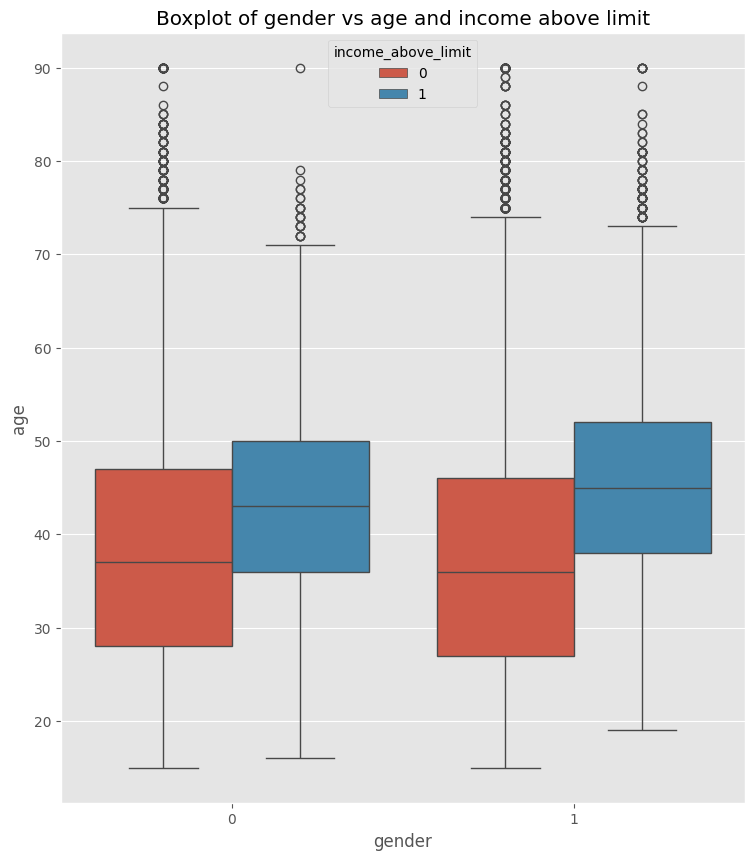

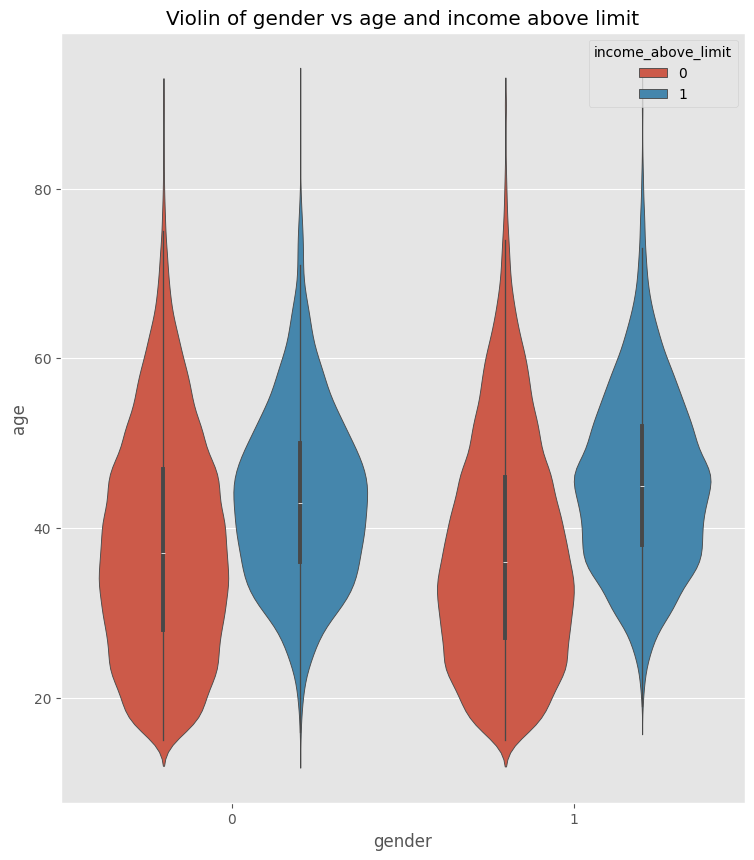

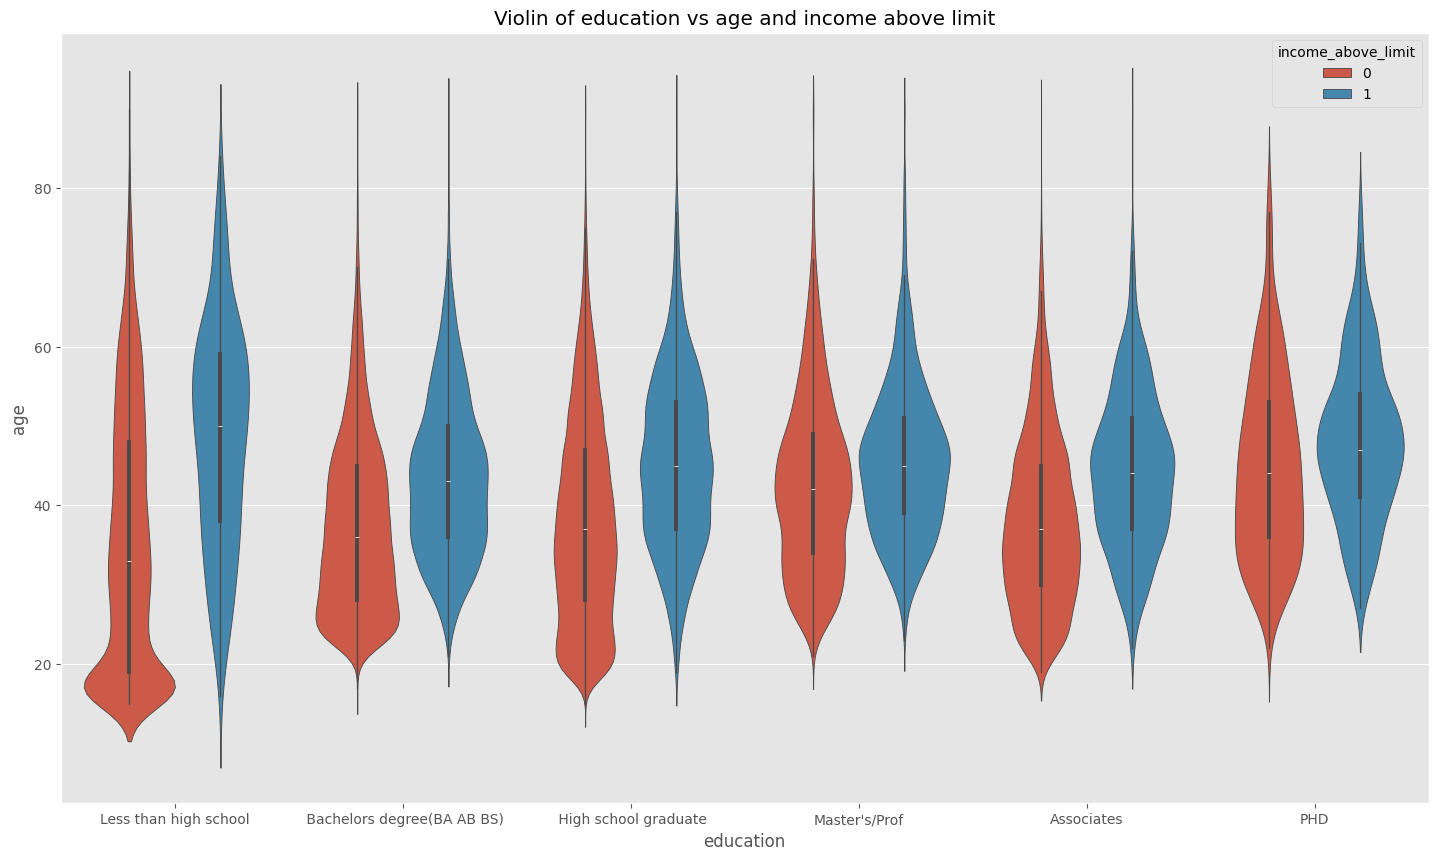

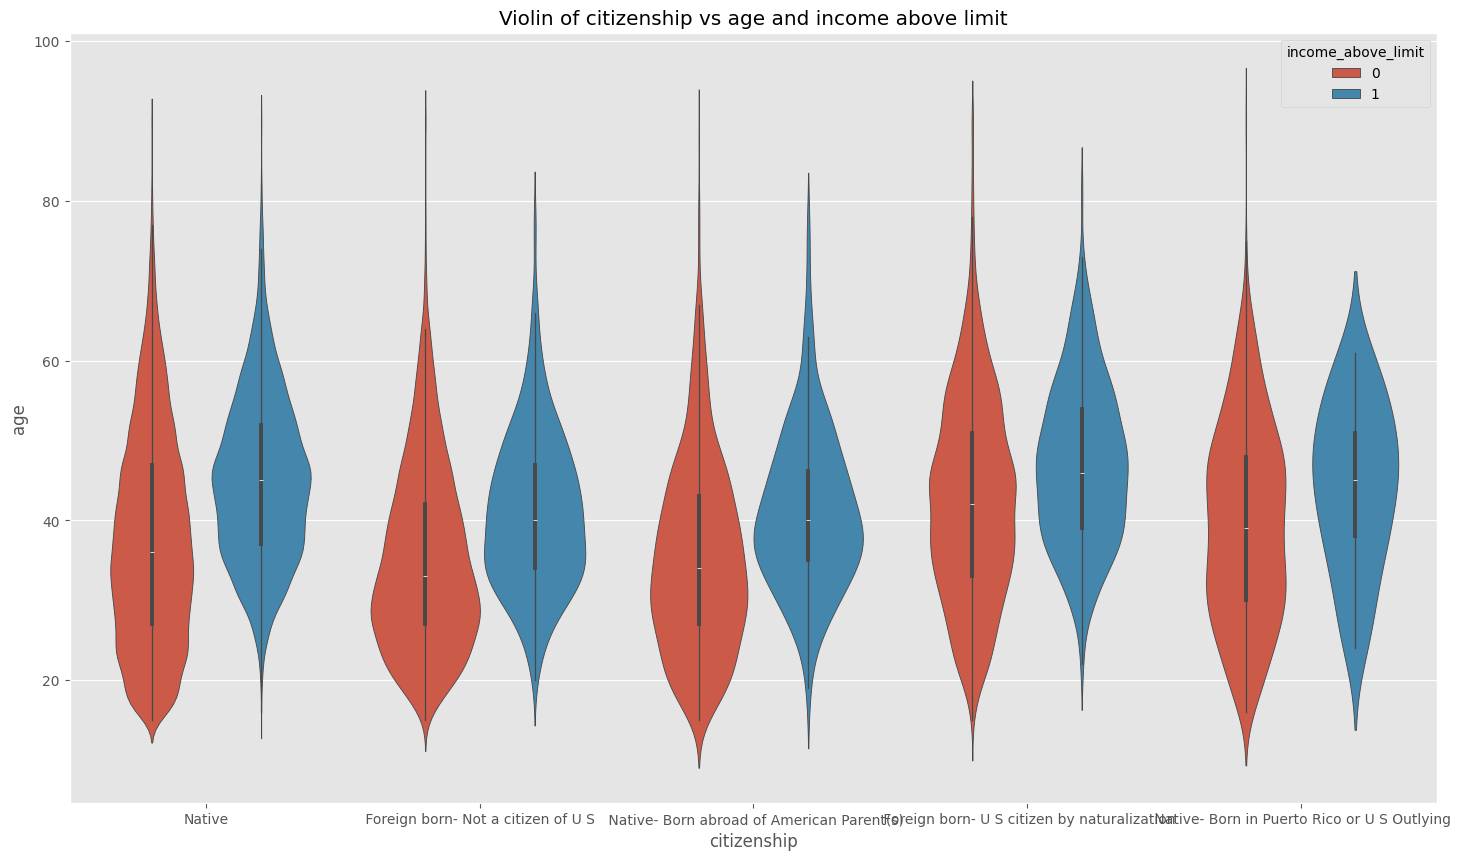

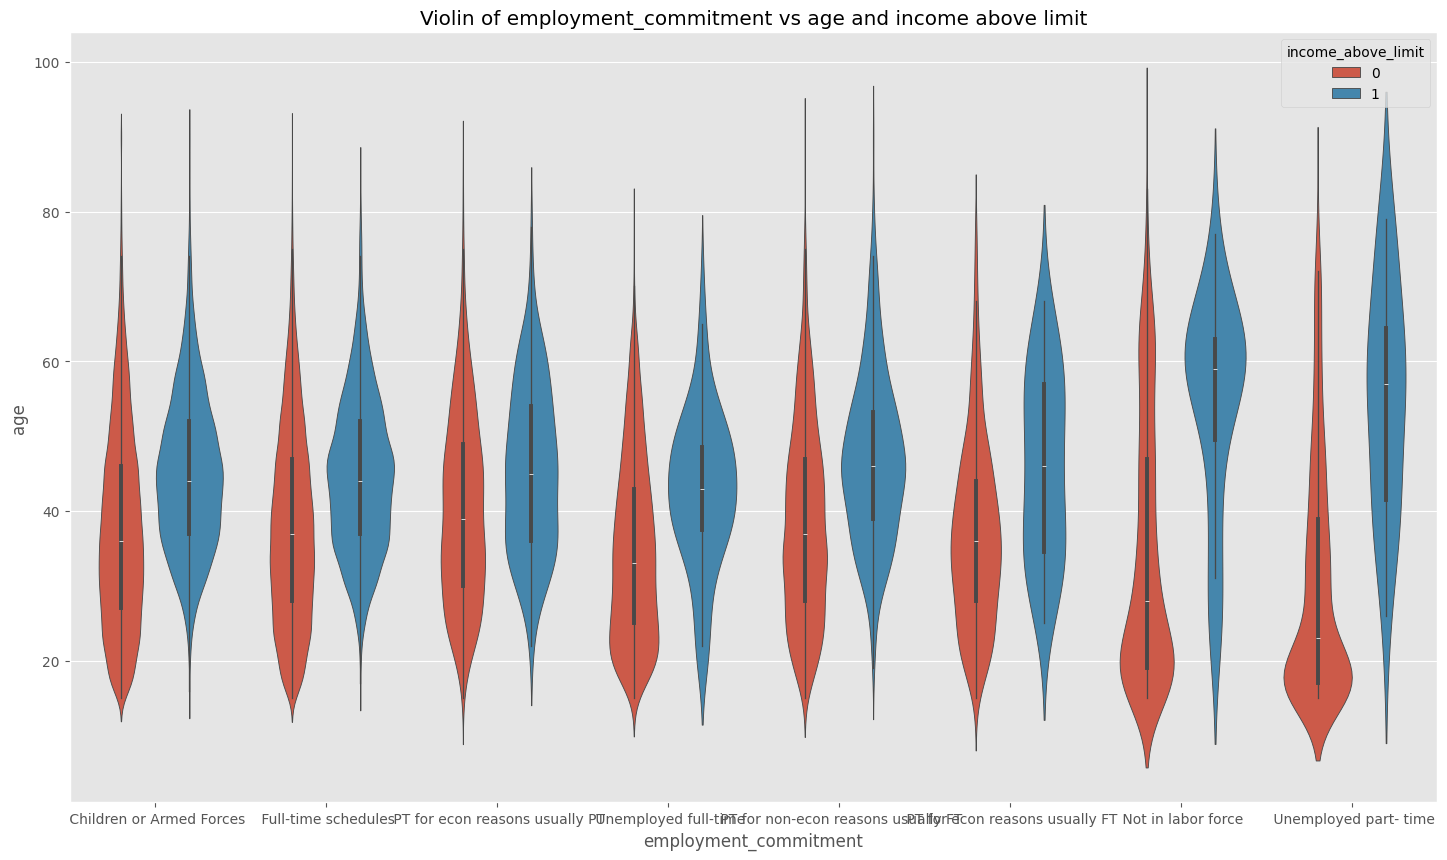

In [15]:
# sns boxplot
plt.subplots(figsize=(30, 10))

plt.subplot(1,3,1)
sns.boxplot(x="gender", y="age", hue="income_above_limit", data=df)
plt.title('Boxplot of gender vs age and income above limit')



# plt.subplot(1,3,3)
# sns.swarmplot(x="gender", y="age", hue="income_above_limit", data=df, s=3) # s controls marker size (like bins or bw)
# plt.title('Swarm Example')

plt.show()

plt.subplots(figsize=(30, 10))
plt.subplot(1,3,2)
sns.violinplot(x="gender", y="age", hue="income_above_limit", data=df)
plt.title('Violin of gender vs age and income above limit')
plt.show()

plt.subplots(figsize=(60, 10))
plt.subplot(1,3,2)
sns.violinplot(x="education", y="age", hue="income_above_limit", data=df)
plt.title('Violin of education vs age and income above limit')
plt.show()

plt.subplots(figsize=(60, 10))
plt.subplot(1,3,2)
sns.violinplot(x="citizenship", y="age", hue="income_above_limit", data=df)
plt.title('Violin of citizenship vs age and income above limit')
plt.show()

plt.subplots(figsize=(60, 10))
plt.subplot(1,3,2)
sns.violinplot(x="employment_commitment", y="age", hue="income_above_limit", data=df)
plt.title('Violin of employment_commitment vs age and income above limit')
plt.show()

# Obversations From Lab 1

## Question 1:
How evident is the wage gap between men and women? 

[Gender Wage Violin Image]

We can notice that there are more men than women who fall below the income threshold. By observing that there are more men than women who fall below the income threshold, we are witnessing a significant disparity in income distribution between genders within the dataset. This finding highlights the existence of a potential wage gap between men and women, where women, on average, may be earning less than men.



## Question 2:
What are the trends of income with education 

[Education Mutated Violin]

It becomes pretty evident from the graph that having at least a Bachelors degree greatly increases your probablity of having an income above the median. Highschool graduates tend to be below the limit during their younger years but a few manage to cross the threshold. Higher levels of education are often associated with access to higher-paying jobs, increased skills and expertise, and greater opportunities for career advancement. This finding highlights the importance of investing in education and lifelong learning as a means of increasing economic opportunities and improving financial outcomes.


## Question 3

What are the trends of employee commitment

From the violin graph, you can notice that if you are unempoloyed, not in the labor force, or unemployed part time, than you tend to be below the limit while those who are employed full time or armed forces tend to be above the limit.


/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_54424/113957915.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x="gender", y="age", hue="income_above_limit", data=df,


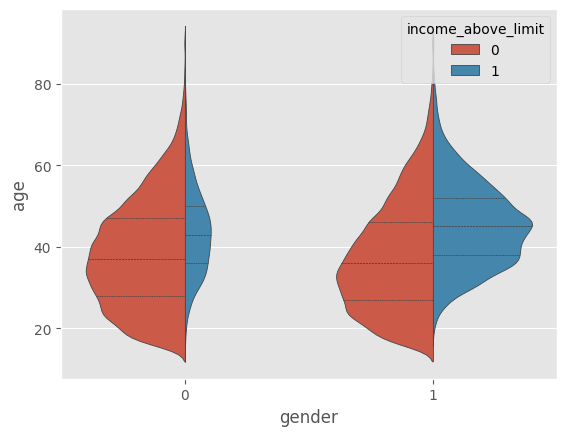

/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_54424/113957915.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x="education", y="age", hue="income_above_limit", data=df,


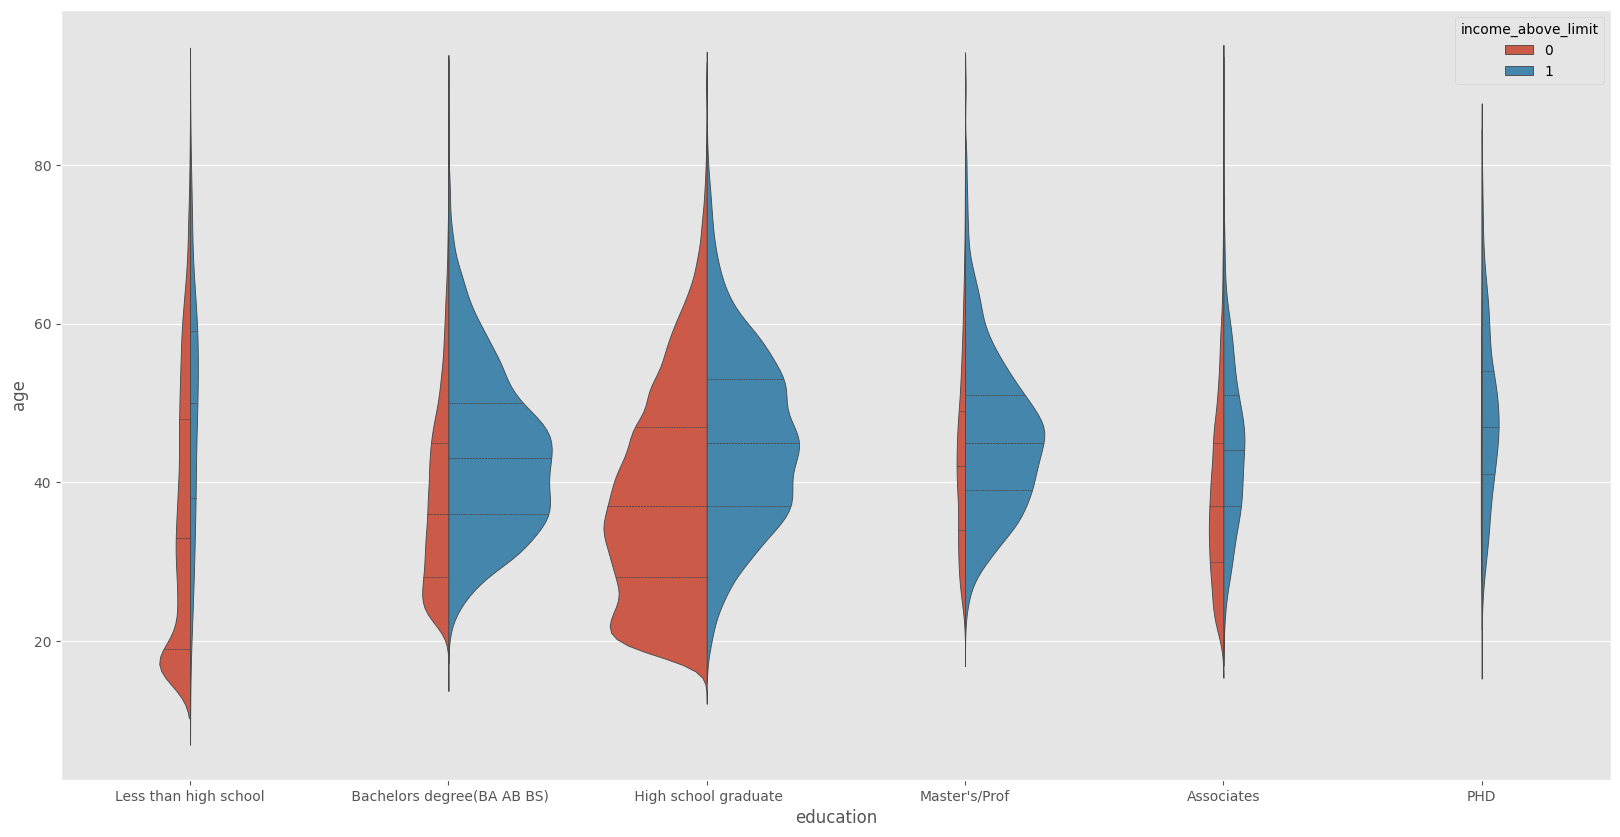

/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_54424/113957915.py:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x="citizenship", y="age", hue="income_above_limit", data=df,


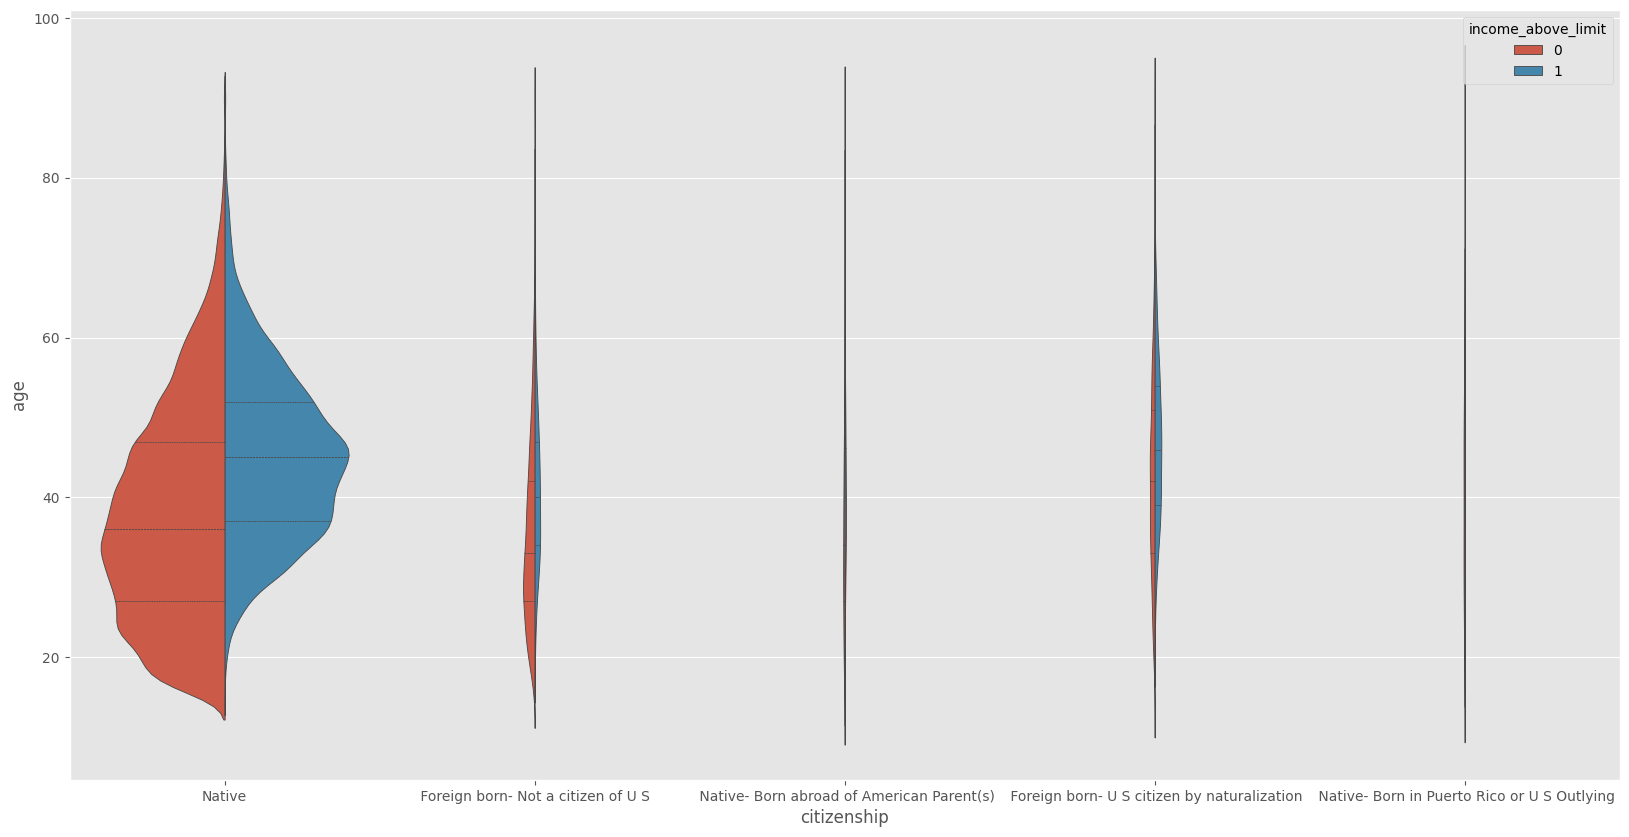

/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_54424/113957915.py:26: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x="employment_commitment", y="age", hue="income_above_limit", data=df,


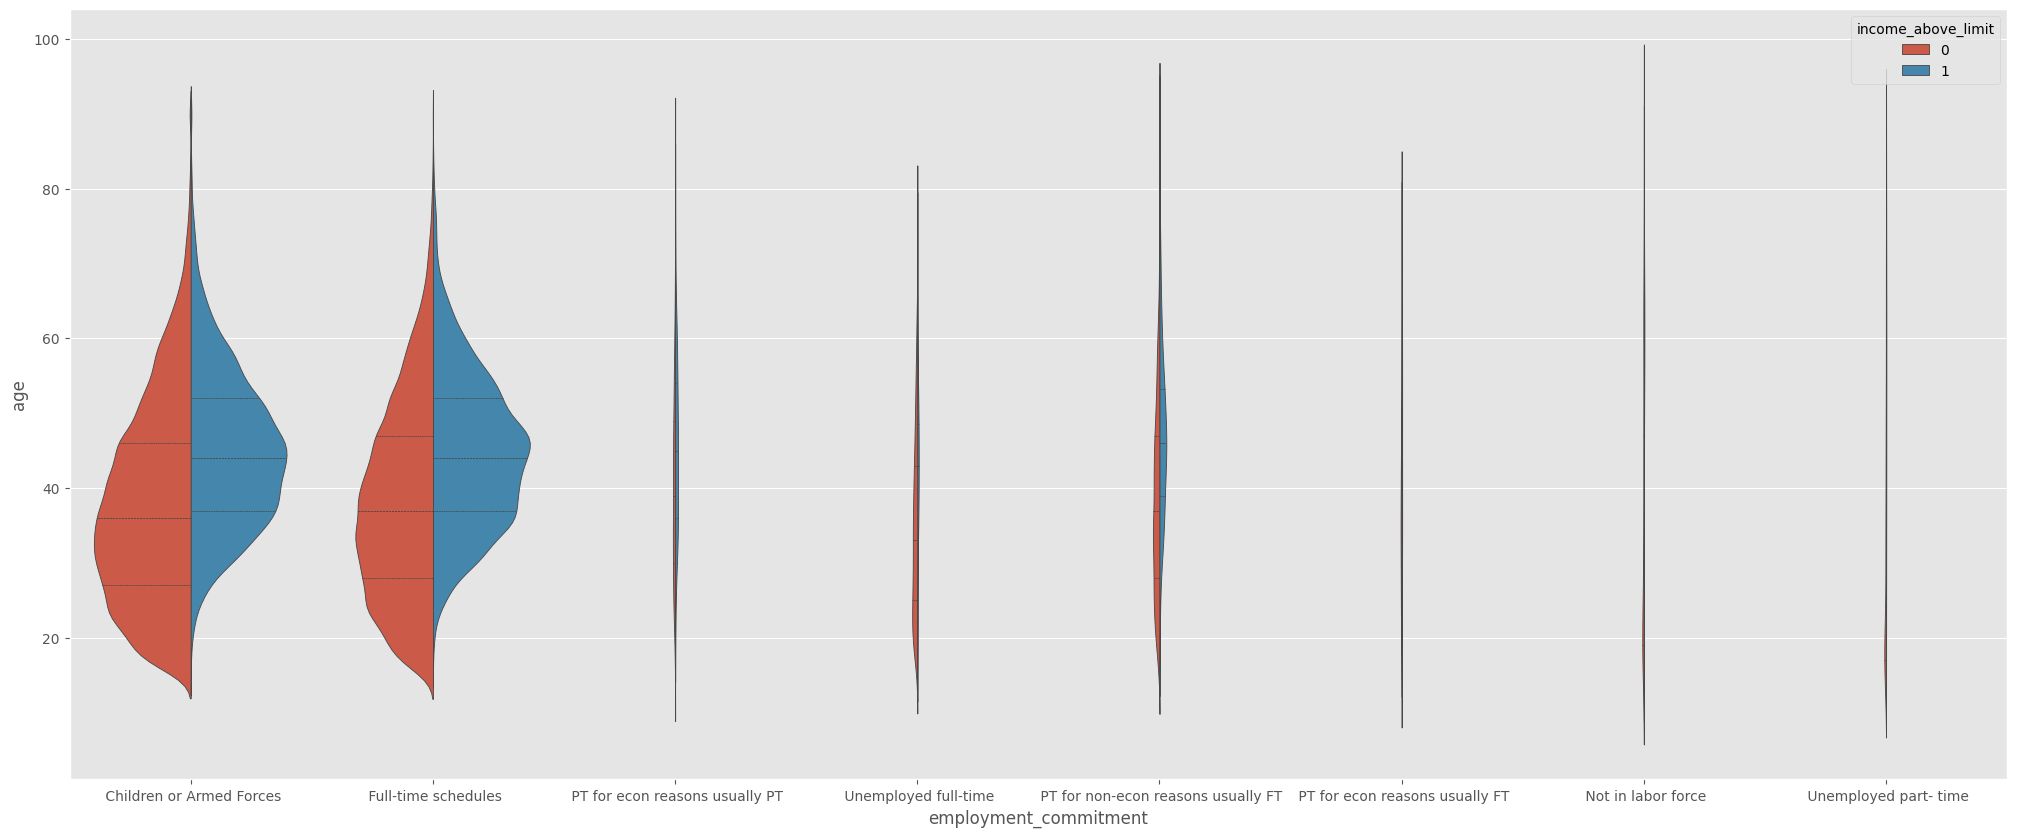

In [16]:
sns.violinplot(x="gender", y="age", hue="income_above_limit", data=df,
               split=True, # split across violins
               inner="quart", # show innner stats like mean, IQR,
               scale="count") # scale the size of the plot by the count within each group

plt.show()

plt.subplots(figsize=(20, 10))  # Increase the figure size to make the plot wider

sns.violinplot(x="education", y="age", hue="income_above_limit", data=df,
               split=True,  # split across violins
               inner="quart",  # show inner stats like mean, IQR,
               scale="count")  # scale the size of the plot by the count within each group

plt.show()

plt.subplots(figsize=(20, 10))  # Increase the figure size to make the plot wider
sns.violinplot(x="citizenship", y="age", hue="income_above_limit", data=df,
               split=True,  # split across violins
               inner="quart",  # show inner stats like mean, IQR,
               scale="count")  # scale the size of the plot by the count within each group

plt.show()

plt.subplots(figsize=(25, 10))  # Increase the figure size to make the plot wider
sns.violinplot(x="employment_commitment", y="age", hue="income_above_limit", data=df,
               split=True,  # split across violins
               inner="quart",  # show inner stats like mean, IQR,
               scale="count")  # scale the size of the plot by the count within each group

plt.show()

In [17]:
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
import plotly
import numpy as np
# let's manipulate the example to serve our purposes

# limit the dataframe to 10000 values
df_limit = df.head(10000)

# plotly allows us to create JS graph elements, like a scatter object
# we put together a dictionary of plotting elements
# 'data': is the key where we place plotting elements
plotly.offline.iplot({
    'data':[
        # plot siblings and spouses versus age as scatter plot
        # and make mouseover text for if they survived
        # create markers that are sized based on the fare paid
        Scatter(x=df_limit.wage_per_hour.values+np.random.rand(*df_limit.wage_per_hour.shape)/2,
                y=df_limit.age,
                text=df_limit.income_above_limit.values.astype(str),
                marker=Marker(size=df_limit.working_week_per_year, sizemode='area', sizeref=1,),
                mode='markers')
            ],
    'layout': Layout(xaxis=XAxis(title='Wage_per_hour'),
                     yaxis=YAxis(title='Age'),
                     title='Age and Family Size (Marker Size==Fare)')
}, show_link=False)

# Modeling

The implementation of logistic regression must be written only from the examples given to you by the instructor. No credit will be assigned to teams that copy implementations from another source, regardless of if the code is properly cited. 


"To extend this beyond binary classification we can use a common trick: train a separate Binary Classifier for each unique class. During prediction, we run an instance through each Binary Classifier, choosing the Binary Classifier that has the highest probability. This is a method known as one-versus-all because we only assume one class is positive when we train each separate Binary Classifier."

Notes from Class:
- https://github.com/eclarson/MachineLearningNotebooks/blob/master/05.%20Logistic%20Regression.ipynb

In [26]:
# Let's start by programming the sigmoid and predictions.


import numpy as np
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
        
blr = BinaryLogisticRegressionBase(0.1)
print(blr)

Base Binary Logistic Regression Object, Not Trainable


In [27]:
# Now let's add the model training function, using the update equation defined previously:

# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

            
blr = BinaryLogisticRegression(0.1)
print(blr)

Untrained Binary Logistic Regression Object


In [28]:
class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,
                                                 self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    
lr = LogisticRegression(0.1,1500)
print(lr)

Untrained MultiClass Logistic Regression Object


In [29]:
%%time

# Load our dataset
ds = df()
X = ds.data
y = ds.target # note problem is NOT binary anymore, there are three classes!


# Training size of 80%, 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2)



lr = LogisticRegression(0.1,500)
lr.fit(X_train,y_train)
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

TypeError: 'DataFrame' object is not callable

In [ ]:
%%time
# Training our classifier

blr = BinaryLogisticRegression(eta=0.1,iterations=12)
blr.fit(X_train,y_train)
print(blr)

NameError: name 'BinaryLogisticRegression' is not defined

### Create a custom, one-versus-all logistic regression classifier using numpy and scipy to optimize. Use object oriented conventions identical to scikit-learn. You should start with the template developed by the instructor in the course. You should add the following functionality to the logistic regression classifier:

- Ability to choose optimization technique when class is instantiated: either steepest ascent, stochastic gradient ascent, and Newton's method. It is recommended to call this the "solver" input for the class.

- Update the gradient calculation to include a customizable regularization term (either using no regularization, L1 regularization, L2 regularization, or both L1 and L2 regularization). Associate a cost with the regularization term, "C", that can be adjusted when the class is instantiated.  


###  Train your classifier to achieve good generalization performance. That is, adjust the optimization technique and the value of the regularization term(s) "C" to achieve the best performance on your test set. Visualize the performance of the classifier versus the parameters you investigated.


Is your method of selecting parameters justified? That is, do you think there is any "data snooping" involved with this method of selecting parameters?

### [1.5 points] Compare the performance of your "best" logistic regression optimization procedure to the procedure used in scikit-learn. Visualize the performance differences in terms of training time and classification performance. Discuss the results. 


# Deployment

Which implementation of logistic regression would you advise be used in a deployed machine learning model, your implementation or scikit-learn (or other third party implementation)? Why?


# Exceptional Work (Required for 7000)


Implement an optimization technique for logistic regression using mean square error as your objective function (instead of maximum likelihood). Derive the gradient updates for the Hessian and use Newton's method to update the values of "w". Then answer, which process do you prefer: maximum likelihood OR minimum mean-squared error?


